In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import *


In [27]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 55.5

Text(0.5, 1.0, 'Cristallo BGO')

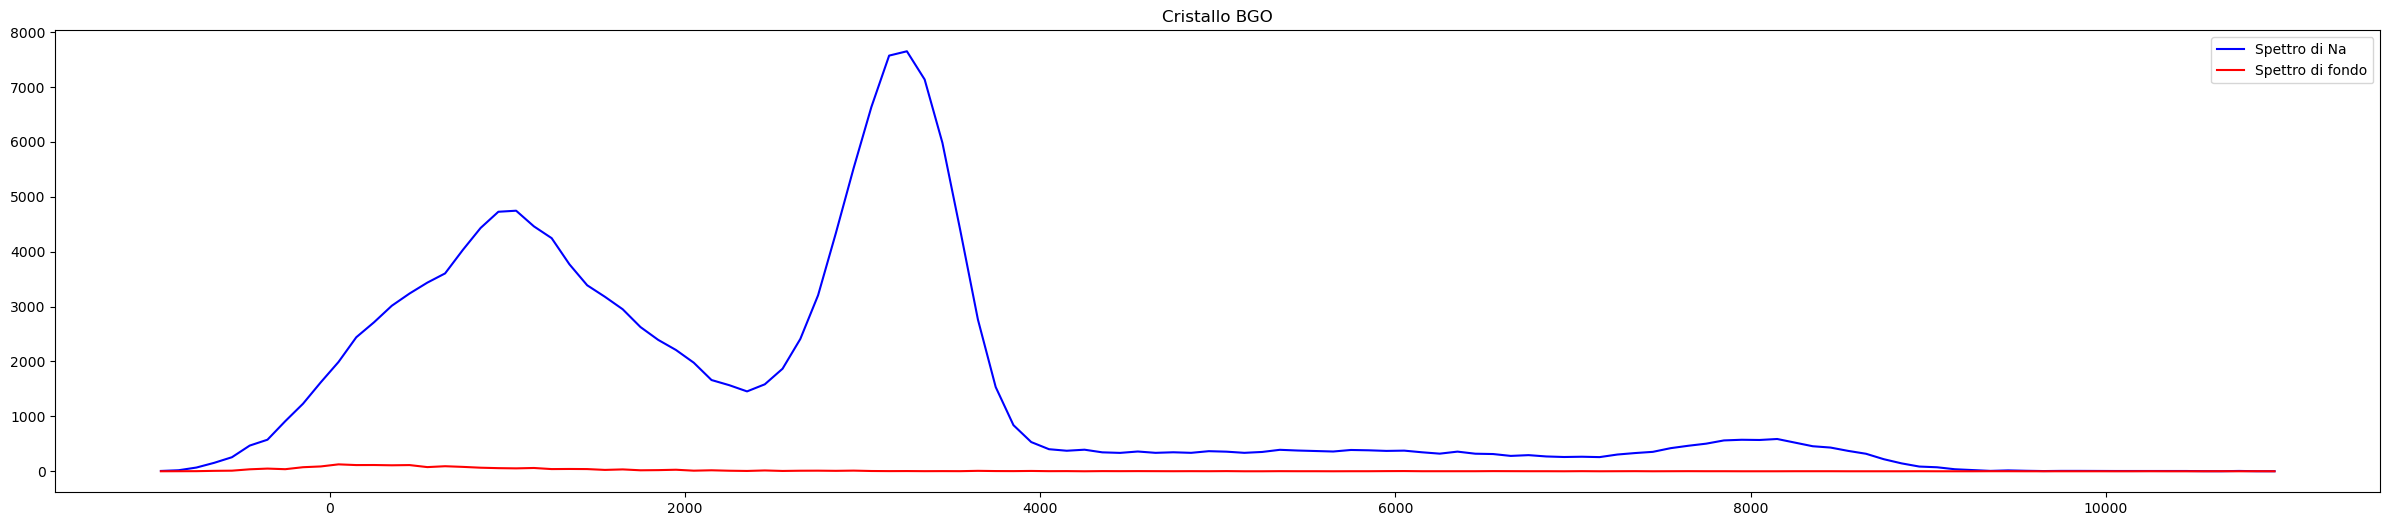

In [10]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= 'True', skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = 'True', header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df['ADC'][:120], df['Counts'][:120], label = 'Spettro di Na', color = 'blue')
plt.plot(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Spettro di fondo', color = 'red')
plt.legend()
plt.title('Cristallo BGO')

In [37]:
start_index = 34
end_index = 49
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts']))
print(err_primo_picco_sodio)
LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss, mu = 3170, sigma = 350, a = 7400 )

[39.79949748 43.22036557 49.09175083 56.62155067 65.8559033  74.29670248
 81.44937078 87.01149349 87.46427842 84.47484833 77.34985456 66.31741853
 52.55473337 39.16631206 28.98275349]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 884.6 (χ²/ndof = 73.7)     │              Nfcn = 68               │
│ EDM = 4.52e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.1704e3  │ 0.0016e3  │            │            │         │         │       │
│ 1 │ sigma │   345.6   │    1.5    │            │            │         │         │       │
│ 2 │ a     │  7.44e3   │  0.04e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.42     -0.5      9.8 │
│ sigma │     -0.5     2.18    -39.1 │
│     a │      9.8    -39.1 1.59e+03 │
└───────┴────────────────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=3170.386376085224 sigma=345.55540178193246 a=7442.144334796588>,
 <ErrorView mu=1.5560446999384154 sigma=1.476177904423376 a=39.84908882854789>,
 0.0,
 12.0,
 884.617201131427,
 ┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │     2.42     -0.5      9.8 │
│ sigma │     -0.5     2.18    -39.1 │
│     a │      9.8    -39.1 1.59e+03 │
└───────┴────────────────────────────┘)